In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [6]:
squad_train_data = pd.read_csv('../Datasets/CSV/SQuAD2.0/train.csv')
squad_dev_data = pd.read_csv('../Datasets/CSV/SQuAD2.0/validation.csv')
squad_all_data = pd.concat([squad_train_data, squad_dev_data])

tydiqa_train_data = pd.read_csv('../Datasets/CSV/TyDiQA/train.csv')
tydiqa_dev_data = pd.read_csv('../Datasets/CSV/TyDiQA/validation.csv')
tydiqa_all_data = pd.concat([tydiqa_train_data, tydiqa_dev_data])

In [7]:
print(squad_train_data.columns)
print(tydiqa_train_data.columns)

Index(['title', 'context', 'question', 'answer_text', 'answer_start'], dtype='object')
Index(['title', 'context', 'question', 'answer_text', 'answer_start'], dtype='object')


In [8]:
print('SQuAD Dataset (Translated to Indonesian)')
print(f'Total title: {len(squad_all_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(squad_all_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(squad_all_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(squad_all_data["answer_text"])}')

print('\n\nTrain Dataset')
print(f'Total title: {len(squad_train_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(squad_train_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(squad_train_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(squad_train_data["answer_text"])}')

print('\n\nDev Dataset')
print(f'Total title: {len(squad_dev_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(squad_dev_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(squad_dev_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(squad_dev_data["answer_text"])}')

SQuAD Dataset (Translated to Indonesian)
Total title: 439
Total context: 18837
Total question: 79926
Total answer: 79999


Train Dataset
Total title: 394
Total context: 17071
Total question: 72559
Total answer: 72623


Dev Dataset
Total title: 45
Total context: 1766
Total question: 7368
Total answer: 7376


In [10]:
print('TyDiQA Dataset')
print(f'Total title: {len(tydiqa_all_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(tydiqa_all_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(tydiqa_all_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(tydiqa_all_data["answer_text"])}')

print('\n\nTrain Dataset')
print(f'Total title: {len(tydiqa_train_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(tydiqa_train_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(tydiqa_train_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(tydiqa_train_data["answer_text"])}')

print('\n\nDev Dataset')
print(f'Total title: {len(tydiqa_dev_data.drop_duplicates(["title"]))}')
print(f'Total context: {len(tydiqa_dev_data.drop_duplicates(["context"]))}')
print(f'Total question: {len(tydiqa_dev_data.drop_duplicates(["question"]))}')
print(f'Total answer: {len(tydiqa_dev_data["answer_text"])}')

TyDiQA Dataset
Total title: 3273
Total context: 4203
Total question: 5702
Total answer: 5702


Train Dataset
Total title: 3042
Total context: 3847
Total question: 5131
Total answer: 5131


Dev Dataset
Total title: 524
Total context: 547
Total question: 571
Total answer: 571


In [11]:
squad_all_data['context_length'] = squad_all_data['context'].apply(lambda x: len(x))
squad_all_data['question_length'] = squad_all_data['question'].apply(lambda x: len(x))
squad_all_data['answer_length'] = squad_all_data['answer_text'].apply(lambda x: len(str(x)))

tydiqa_all_data['context_length'] = tydiqa_all_data['context'].apply(lambda x: len(x))
tydiqa_all_data['question_length'] = tydiqa_all_data['question'].apply(lambda x: len(x))
tydiqa_all_data['answer_length'] = tydiqa_all_data['answer_text'].apply(lambda x: len(str(x)))

In [12]:
# Context length

squad_context_length = squad_all_data.drop_duplicates(["context"])['context_length'].to_list()
tydiqa_context_length = tydiqa_all_data.drop_duplicates(["context"])['context_length'].to_list()

print("SQuAD Context Length")
print(squad_all_data.drop_duplicates(["context"])['context_length'].describe())

print('\n')

print("TyDiQA Context Length")
print(tydiqa_all_data.drop_duplicates(["context"])['context_length'].describe())

SQuAD Context Length
count    18837.000000
mean       763.361257
std        325.742737
min        122.000000
25%        566.000000
50%        702.000000
75%        913.000000
max       3811.000000
Name: context_length, dtype: float64


TyDiQA Context Length
count     4203.000000
mean       576.373067
std        537.412459
min         29.000000
25%        333.000000
50%        488.000000
75%        708.500000
max      19895.000000
Name: context_length, dtype: float64


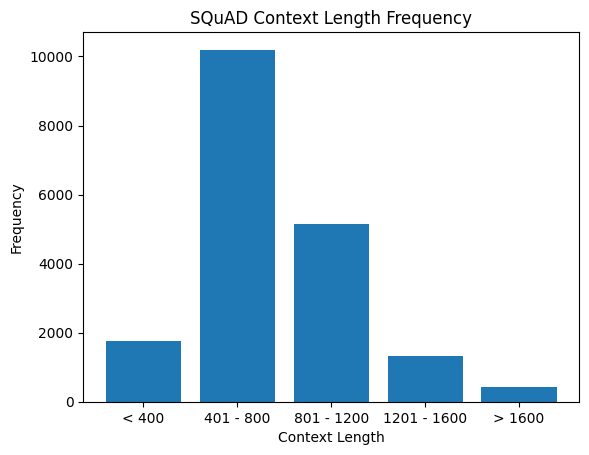

In [13]:
bins = [0, 400, 800, 1200, 1600, np.inf]
labels = ['< 400', '401 - 800', '801 - 1200', '1201 - 1600', '> 1600']

freqs, edges = np.histogram(squad_context_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.title('SQuAD Context Length Frequency')

plt.show()

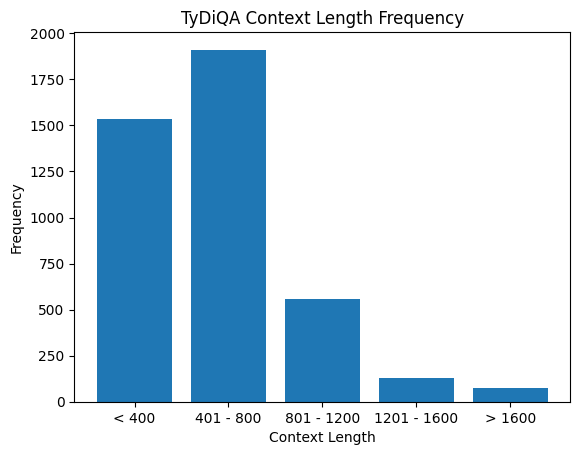

In [14]:
bins = [0, 400, 800, 1200, 1600, np.inf]
labels = ['< 400', '401 - 800', '801 - 1200', '1201 - 1600', '> 1600']

freqs, edges = np.histogram(tydiqa_context_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.title('TyDiQA Context Length Frequency')

plt.show()

In [15]:
# Question length

squad_question_length = squad_all_data.drop_duplicates(["question"])['question_length'].to_list()
tydiqa_question_length = tydiqa_all_data.drop_duplicates(["question"])['question_length'].to_list()

print("SQuAD Question Length")
print(squad_all_data.drop_duplicates(["question"])['question_length'].describe())

print('\n')

print("TyDiQA Question Length")
print(tydiqa_all_data.drop_duplicates(["question"])['question_length'].describe())

SQuAD Question Length
count    79926.000000
mean        60.798439
std         23.371236
min          2.000000
25%         44.000000
50%         58.000000
75%         74.000000
max        273.000000
Name: question_length, dtype: float64


TyDiQA Question Length
count    5702.000000
mean       36.956682
std        10.967176
min        12.000000
25%        29.000000
50%        36.000000
75%        43.000000
max       101.000000
Name: question_length, dtype: float64


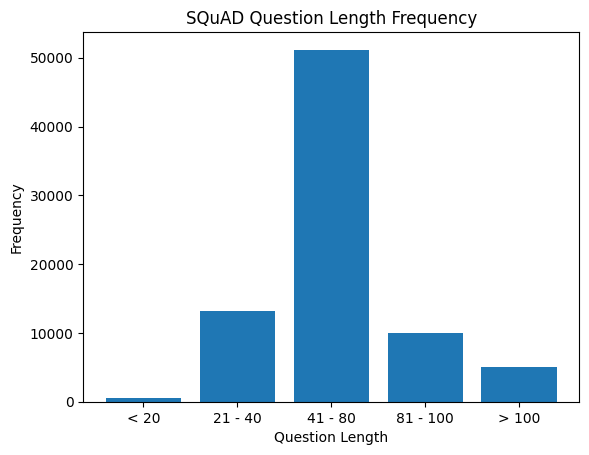

In [16]:
bins = [0, 20, 40, 80, 100, np.inf]
labels = ['< 20', '21 - 40', '41 - 80', '81 - 100', '> 100']

freqs, edges = np.histogram(squad_question_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('SQuAD Question Length Frequency')

plt.show()

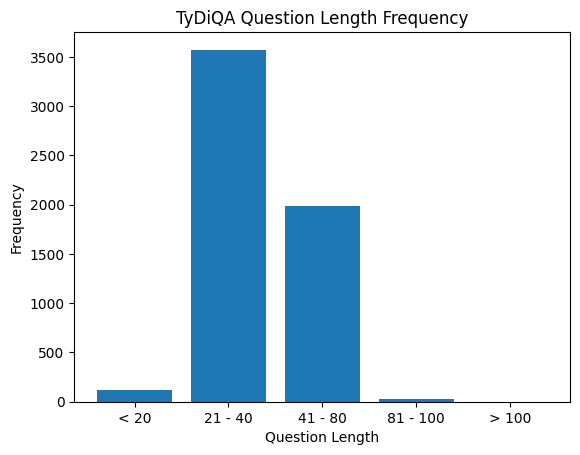

In [17]:
bins = [0, 20, 40, 80, 100, np.inf]
labels = ['< 20', '21 - 40', '41 - 80', '81 - 100', '> 100']

freqs, edges = np.histogram(tydiqa_question_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('TyDiQA Question Length Frequency')

plt.show()

In [18]:
# Answer length

squad_answer_length = squad_all_data.drop_duplicates(["answer_text"])['answer_length'].to_list()
tydiqa_answer_length = tydiqa_all_data.drop_duplicates(["answer_text"])['answer_length'].to_list()

print("SQuAD Answer Length")
print(squad_all_data.drop_duplicates(["answer_text"])['answer_length'].describe())

print('\n')

print("TyDiQA Answer Length")
print(tydiqa_all_data.drop_duplicates(["answer_text"])['answer_length'].describe())

SQuAD Answer Length
count    57718.000000
mean        24.784747
std         24.578555
min          1.000000
25%         11.000000
50%         17.000000
75%         29.000000
max        240.000000
Name: answer_length, dtype: float64


TyDiQA Answer Length
count    4321.000000
mean       38.244156
std        50.918002
min         2.000000
25%         9.000000
50%        16.000000
75%        45.000000
max       476.000000
Name: answer_length, dtype: float64


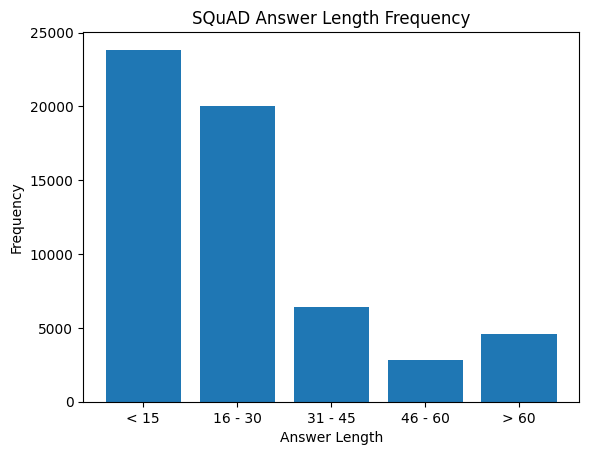

In [19]:
bins = [0, 15, 30, 45, 60, np.inf]
labels = ['< 15', '16 - 30', '31 - 45', '46 - 60', '> 60']

freqs, edges = np.histogram(squad_answer_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('SQuAD Answer Length Frequency')

plt.show()

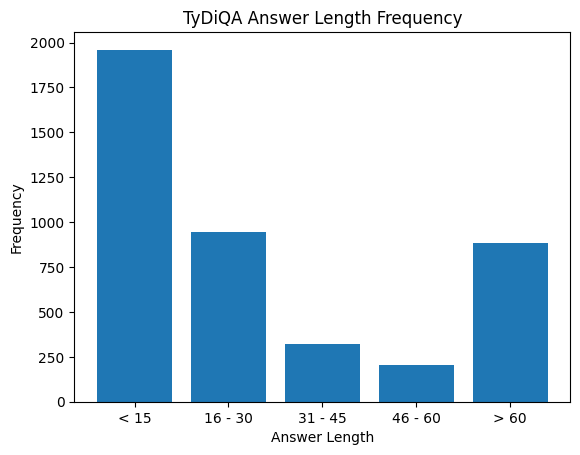

In [20]:
bins = [0, 15, 30, 45, 60, np.inf]
labels = ['< 15', '16 - 30', '31 - 45', '46 - 60', '> 60']

freqs, edges = np.histogram(tydiqa_answer_length, bins)

plt.bar(range(len(bins)-1), freqs, tick_label=labels)
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('TyDiQA Answer Length Frequency')

plt.show()

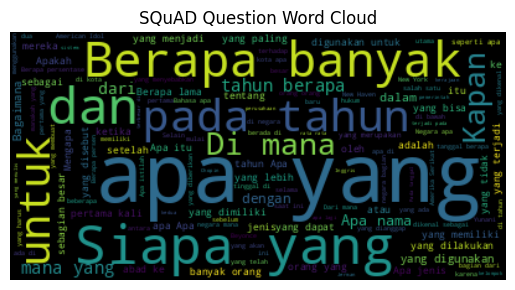

In [21]:
wordcloud = WordCloud().generate(" ".join(q for q in squad_all_data['question']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('SQuAD Question Word Cloud')
plt.show()

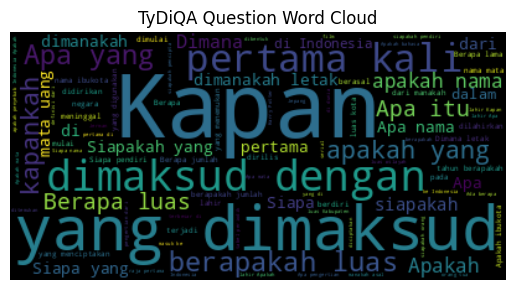

In [22]:
wordcloud = WordCloud().generate(" ".join(q for q in tydiqa_all_data['question']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('TyDiQA Question Word Cloud')
plt.show()